# Probability Assignment

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

In [35]:
import numpy as np
import scipy as sc
import pandas as pa
import seaborn as sns
import matplotlib.pyplot as plt


## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis.


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others.

In [36]:
# Code here
#gs: the resident’s glove size. Glove sizes typically range from 5.5 to 9 in increments of 0.5, but for ease of modeling, we will make it a continuous variable, and model it with the Normal distribution. Glove size will not be correlated with the variables, as residents’ glove sizes, unless they are the wrong size, do not impact their performance.
#  Normal distribution- mean, stan-dev, sive
# gs <- rnorm(1e4, 7.25, 0.875)
gs = np.random.normal(7.25, 0.875, 10000)
print(gs)



[6.00383864 7.47213779 6.1899014  ... 7.1671525  6.37852397 7.19630698]


## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots.



             ak        pp     ptime
ak     1.000000  0.604843 -0.900638
pp     0.604843  1.000000 -0.511553
ptime -0.900638 -0.511553  1.000000


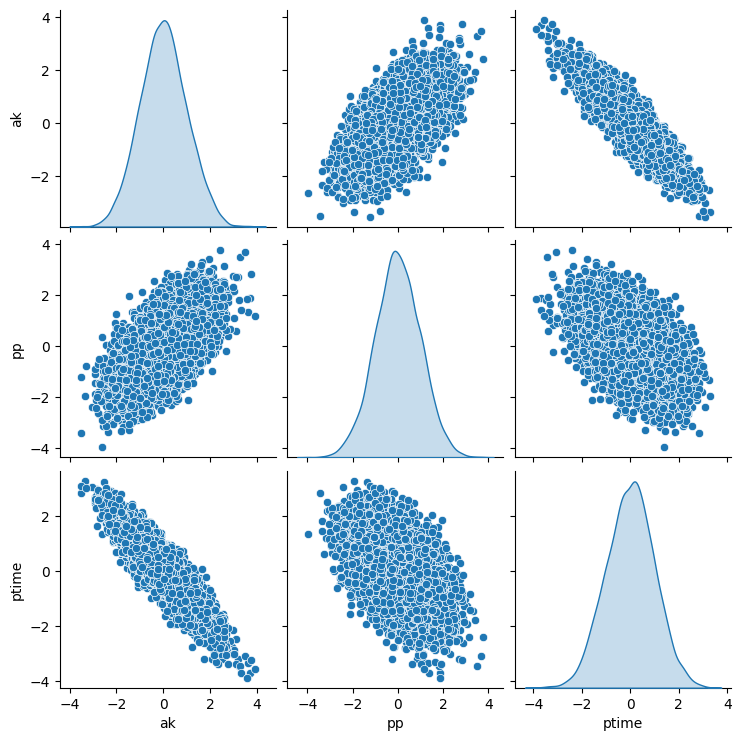

In [37]:
from IPython.core.application import Application
# ak: the number of air knots (
# pp: the number of times a resident “passes point”
# ptime: amount of time the resident spends practicing each week.
#  matrix(c(1, 0.6, -0.9, 0.6, 1, -0.5, -0.9, -0.5, 1), 3, 3)
#  mean of 0 and standard deviation of 1 for each variable
sigma = [[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]]
mu = [0,0,0]
np.random.seed(1234)

#mvrnorm <- function(n = 1, mu = 0, Sigma) {
#  nvars <- nrow(Sigma)
  # nvars x n matrix of Normal(0, 1)
#  nmls <- matrix(rnorm(n * nvars), nrow = nvars)
  # scale and correlate Normal(0, 1), "nmls", to Normal(0, Sigma) by matrix mult
  # with lower triangular of cholesky decomp of covariance matrix
#  scaled_correlated_nmls <- t(chol(Sigma)) %*% nmls
  # shift to center around mus to get goal: Normal(mu, Sigma)
#  samples <- mu + scaled_correlated_nmls
  # transpose so each variable is a column, not
  # a row, to match what MASS::mvrnorm() returns
#  t(samples)


apt = np.random.multivariate_normal(mu, sigma, 10000)
#pairs(APT, labels = c("ak", "pp", "ptime"))
df = pa.DataFrame(apt, columns=["ak", "pp", "ptime"])

#cor(APT)
correlation_matrix = df.corr()
print(correlation_matrix)

sns.pairplot(df, diag_kind='kde')
plt.show()



## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

             ak        pp     ptime
ak     1.000000  0.586327 -0.891784
pp     0.586327  1.000000 -0.495277
ptime -0.891784 -0.495277  1.000000


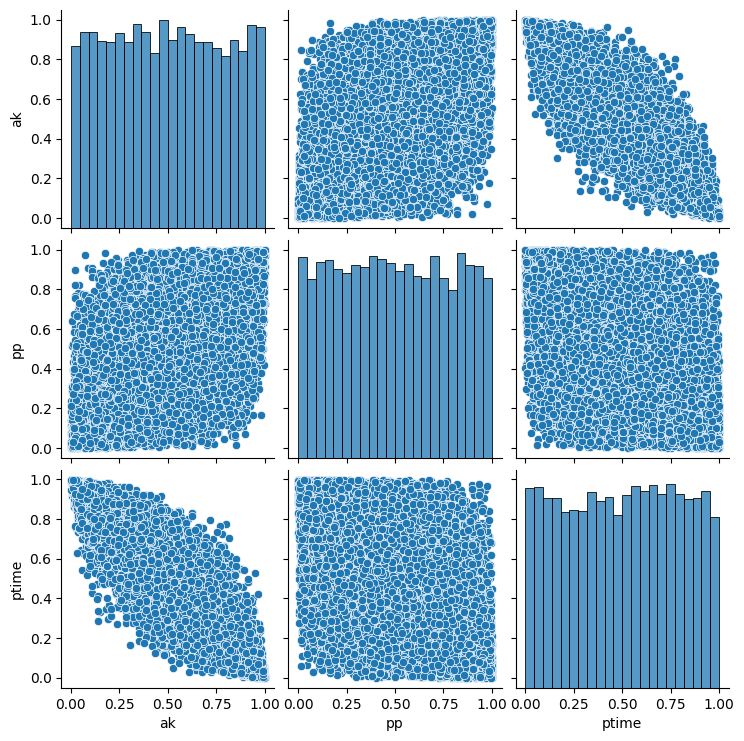

In [38]:
# Code here
u =  sc.stats.norm.cdf(apt)
dfu = pa.DataFrame(u, columns=["ak", "pp", "ptime"])

corru = dfu.corr()
print(corru)
sns.pairplot(dfu)
plt.show()

## Question 1d (20 points)

Perform the inverse transform sampling.

In [39]:
#Code here
# ak <- qpois(U[, 1], 5)
ak = sc.stats.poisson.ppf(u[:, 0], 5)
# pp <- qpois(U[, 2], 15)
pp = sc.stats.poisson.ppf(u[:, 1], 15)
# ptime <- qnorm(U[, 3], 120, 30)
ptime = sc.stats.norm.ppf(u[:, 2],120, 30)


## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


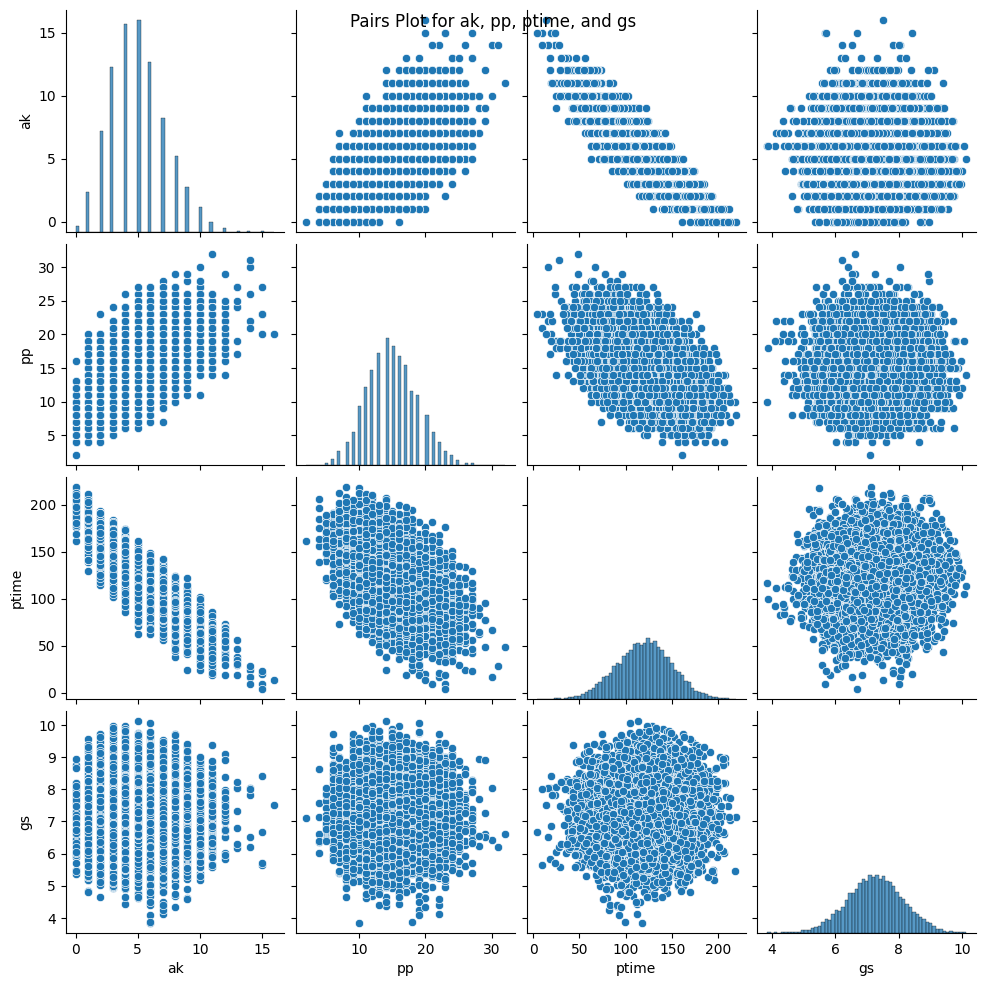

In [34]:
#Code here
data = pa.DataFrame({'ak': ak, 'pp': pp, 'ptime': ptime, 'gs': gs})

# Create a pairs plot to visualize the correlations
sns.pairplot(data)
plt.suptitle("Pairs Plot for ak, pp, ptime, and gs")
plt.show()

## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$.

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

In [ ]:
#Code here